# Title:Air Quality Forecasting

In [24]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns   
import matplotlib.pyplot as plt



## Data Understanding



In [25]:
#reading the dataset
df = pd.read_csv('data.csv', index_col=0)
df.head()   

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
No,,,,,,,,,,,,,,,,,
1,2013,3,1,0,6.0,18.0,5.0,NaN,800.0,88.0,0.1,1021.1,-18.6,0.0,NW,4.4,Gucheng
2,2013,3,1,1,6.0,15.0,5.0,NaN,800.0,88.0,-0.3,1021.5,-19.0,0.0,NW,4.0,Gucheng
3,2013,3,1,2,5.0,18.0,NaN,NaN,700.0,52.0,-0.7,1021.5,-19.8,0.0,WNW,4.6,Gucheng
4,2013,3,1,3,6.0,20.0,6.0,NaN,NaN,NaN,-1.0,1022.7,-21.2,0.0,W,2.8,Gucheng
5,2013,3,1,4,5.0,17.0,5.0,NaN,600.0,73.0,-1.3,1023.0,-21.4,0.0,WNW,3.6,Gucheng



Our dataset is obtained from __[UC Irvine ML Repository](https://archive.ics.uci.edu/dataset/381/beijing+pm2+5+data)__ . This data has values recorded hourly from air quality monitoring sites.<br>

The data set covers the time span from March 1st, 2013, to February 28th, 2017. The following presents details for each feature/column : <br>

- `No`: row number
- `year`: year of data in this row
- `month`: month of data in this row
- `day`: day of data in this row
- `hour`: hour of data in this row
- `PM2.5`: PM2.5 concentration (ug/m^3)
- `PM10`: PM10 concentration (ug/m^3)
- `SO2`: SO2 concentration (ug/m^3)
- `NO2`: NO2 concentration (ug/m^3)
- `CO`: CO concentration (ug/m^3)
- `O3`: O3 concentration (ug/m^3)
- `TEMP`: temperature (degree Celsius)
- `PRES`: pressure (hPa)
- `DEWP`: dew point temperature (degree Celsius)
- `RAIN`: precipitation (mm)
- `wd`: wind direction
- `WSPM`: wind speed (m/s)
- `station`: name of the air-quality monitoring site <br>


Throughout this project, our attention will be solely directed to the `PM2.5 `feature. PM2.5 stands for particles with a diameter smaller than 2.5 micrometers, which is over 10 times thinner than a human hair—quite intriguing, isn't it? These particles emerge from burning fuel and chemical reactions in the atmosphere, be it coal in a power plant or gasoline in your car. Remarkably tiny, they have the potential to penetrate deep into the lungs and bloodstream, posing a gradual threat to your body over time.

In [26]:
df.shape #to check the number of rows and columns

(35064, 17)

The data contains 35064 rows and 18 columns.

In [27]:
df.info() #to check the data type of each column

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35064 entries, 1 to 35064
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   year     35064 non-null  int64  
 1   month    35064 non-null  int64  
 2   day      35064 non-null  int64  
 3   hour     35064 non-null  int64  
 4   PM2.5    34418 non-null  float64
 5   PM10     34683 non-null  float64
 6   SO2      34557 non-null  float64
 7   NO2      34396 non-null  float64
 8   CO       33663 non-null  float64
 9   O3       34335 non-null  float64
 10  TEMP     35013 non-null  float64
 11  PRES     35014 non-null  float64
 12  DEWP     35013 non-null  float64
 13  RAIN     35021 non-null  float64
 14  wd       34905 non-null  object 
 15  WSPM     35022 non-null  float64
 16  station  35064 non-null  object 
dtypes: float64(11), int64(4), object(2)
memory usage: 4.8+ MB


In [28]:
df.describe() #to check the statistical summary of the dataset  

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,34418.000000,34683.000000,34557.000000,34396.000000,33663.000000,34335.000000,35013.000000,35014.000000,35013.000000,35021.000000,35022.000000
mean,2014.662560,6.522930,15.729637,11.500000,83.852089,118.861978,15.366162,55.871075,1323.974423,57.694879,13.864524,1008.829592,2.610442,0.064453,1.343310
std,1.177213,3.448752,8.800218,6.922285,82.796445,96.742626,21.204526,36.473860,1208.957772,57.019587,11.292857,10.103256,13.782991,0.838654,1.151064
min,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-15.600000,984.000000,-34.600000,0.000000,0.000000
25%,2014.000000,4.000000,8.000000,5.750000,24.000000,45.000000,2.000000,26.000000,600.000000,10.000000,3.600000,1000.500000,-8.900000,0.000000,0.600000
50%,2015.000000,7.000000,16.000000,11.500000,60.000000,99.000000,7.000000,50.000000,900.000000,45.000000,14.800000,1008.500000,3.000000,0.000000,1.000000
75%,2016.000000,10.000000,23.000000,17.250000,115.750000,167.000000,20.000000,79.000000,1600.000000,83.000000,23.500000,1017.000000,15.300000,0.000000,1.800000
max,2017.000000,12.000000,31.000000,23.000000,770.000000,994.000000,500.000000,276.000000,10000.000000,450.000000,41.600000,1038.100000,27.400000,41.900000,12.000000


## Summary Statistics Insights

Based on the summary statistics obtained from `df.describe()`, here are some key observations about the air quality dataset:

1. **Data Spread and Central Tendency**:
   - **PM2.5 and PM10 Levels**: The mean levels of PM2.5 and PM10 are **83.85** and **118.86**, respectively. This indicates a potentially concerning level of these pollutants in the air.
   - **Temperature and Pressure**: The average temperature (`TEMP`) is around **13.86°C**, and the average pressure (`PRES`) is approximately **1008.83 hPa**.

2. **Variability in Data**:
   - **High Variability in Pollutant Levels**: The standard deviations for PM2.5 and PM10 are **82.80** and **96.74**, respectively. This indicates a high level of variability in air pollutant concentrations.
   - **Temperature and Dew Point**: Significant variability is observed in temperature and dew point (`DEWP`), as indicated by their standard deviations (**11.29** for `TEMP` and **13.78** for `DEWP`).

3. **Range of Data**:
   - **Extremes in Pollutants**: The maximum values for PM2.5 and PM10 are **770** and **994**, which are extremely high, suggesting episodes of severe air pollution.
   - **Temperature Range**: The temperature ranges from a low of **-15.6°C** to a high of **41.6°C**, indicating a wide range of weather conditions.

4. **Potential Outliers**:
   - The maximum values for pollutants like PM2.5, PM10, SO2, NO2, and CO are significantly higher than their respective 75th percentiles, suggesting the presence of outliers or extreme pollution events.

5. **Missing Values**:
   - While `df.describe()` does not directly show missing values, the count of non-null entries for each column indicates the presence of missing data. For example, PM2.5 has 34,418 non-null entries out of 35,064, indicating some missing values.

6. **Wind Speed**:
   - The wind speed (`WSPM`) has an average of **1.34 m/s** with a maximum of **12 m/s**. This can be important in understanding the dispersion of pollutants.

These observations provide a comprehensive overview of the dataset's characteristics, highlighting aspects such as the air quality, environmental conditions, and variability in pollutant concentrations. The dataset's wide range of values and high variability, especially in pollutants, could be focal points for further detailed analysis.


## Data Cleaning

In [29]:
#checking for null values
df.isna().sum()

year          0
month         0
day           0
hour          0
PM2.5       646
PM10        381
SO2         507
NO2         668
CO         1401
O3          729
TEMP         51
PRES         50
DEWP         51
RAIN         43
wd          159
WSPM         42
station       0
dtype: int64

In [30]:
#Perform forward filling of missing values
df = df.ffill()

In [31]:
df.isna().sum()

year        0
month       0
day         0
hour        0
PM2.5       0
PM10        0
SO2         0
NO2        20
CO          0
O3          0
TEMP        0
PRES        0
DEWP        0
RAIN        0
wd          0
WSPM        0
station     0
dtype: int64

In [32]:
# Drop unnecessary columns
df = df.drop(['NO2'], axis=1)

In [33]:
#convert the year,month, day ,hour columns to datetime format
df['year']= pd.to_datetime(df['year'])
df['month']= pd.to_datetime(df['month'])
df['day']= pd.to_datetime(df['day'])
df['hour']= pd.to_datetime(df['hour'])

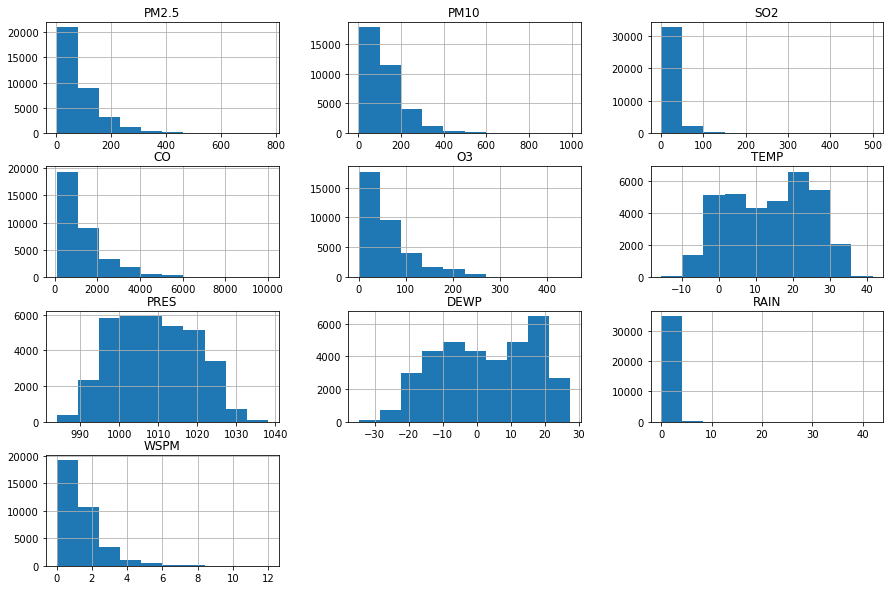

In [37]:
#histogram for numerical columns
df.hist(figsize=(15,10))
plt.show()

In [38]:
#Investigating only time and the column PM2.5

df1 = pd.to_datetime(df[["year", "month", "day", "hour"]])
data = pd.concat([df1, df['PM2.5']], axis = 1)
data = data.rename(columns = {0: "Time", 'PM2.5': 'PM2.5'})
data.set_index('Time', inplace = True)
data.head()

,PM2.5
Time,
2013-03-01 00:00:00,6.0
2013-03-01 01:00:00,6.0
2013-03-01 02:00:00,5.0
2013-03-01 03:00:00,6.0
2013-03-01 04:00:00,5.0


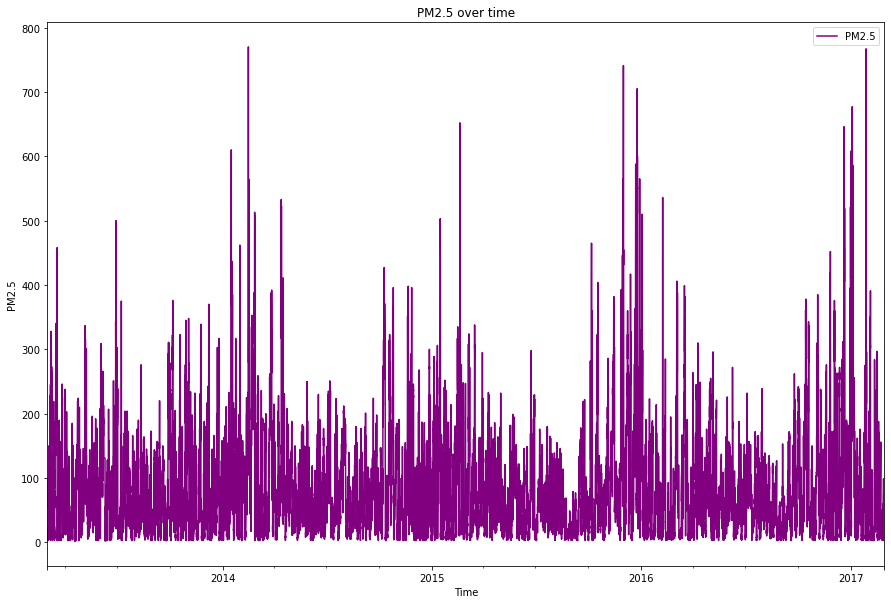

In [50]:
data.plot(figsize=(15,10), color = 'purple')
plt.ylabel('PM2.5')
plt.title('PM2.5 over time')
plt.show()